# Understanding of 

## 분산과 편향 (trade off between variance & bias)

## 과적합과 정규화 (overfitting with regularization)

## 학습곡선 (learning curve)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
import numpy.random as rnd
np.random.seed(42)

## 1. original data generation

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(-3.0, 3.0, 0.0, 10.0)

Text(0.5, 1.0, 'quadratic_data_plot')

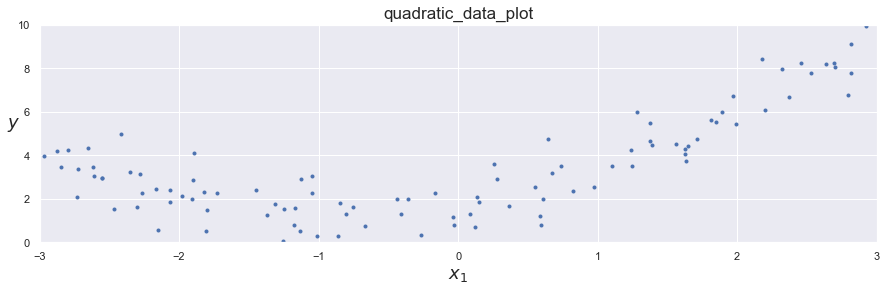

In [3]:
sns.set()
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.rcParams["figure.figsize"] = (15,4)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("quadratic_data_plot", fontsize=17)
plt.show()

## 2. original to polynomial data 변환 후(2차) 선형회귀 학습

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0:5]
X_poly[0:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

LinearRegression()

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(-3.0, 3.0, 0.0, 10.0)

Text(0.5, 1.0, 'quadratic_data & predictions_plot')

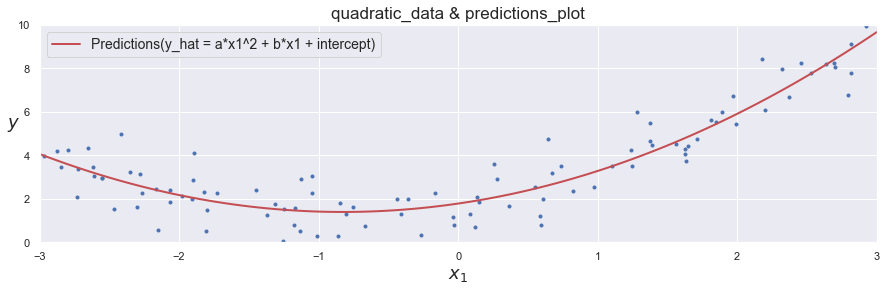

In [6]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions(y_hat = a*x1^2 + b*x1 + intercept)")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.title("quadratic_data & predictions_plot", fontsize=17)
plt.show()

### <font color='blue'> 2차 함수인 경우가 fit가 잘 되고 있음

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(-3.0, 3.0, 0.0, 10.0)

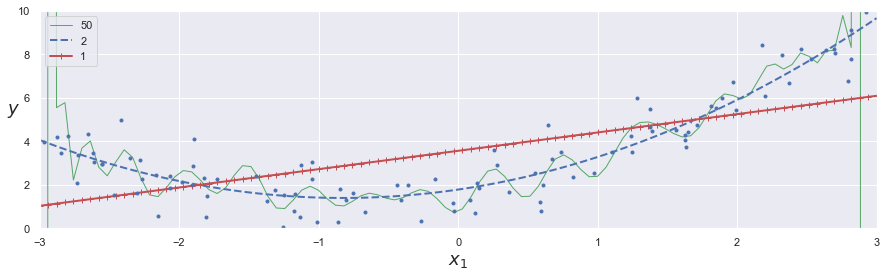

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 50), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
   
    y_newbig =  polynomial_regression.fit(X, y).predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

## 3. 학습곡선(learning curve)

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

### 3.1 Underfitting model (Low complexity model)
- 원래 데이터를 단순 션형회귀한 직선

(0.0, 80.0, 0.0, 3.0)

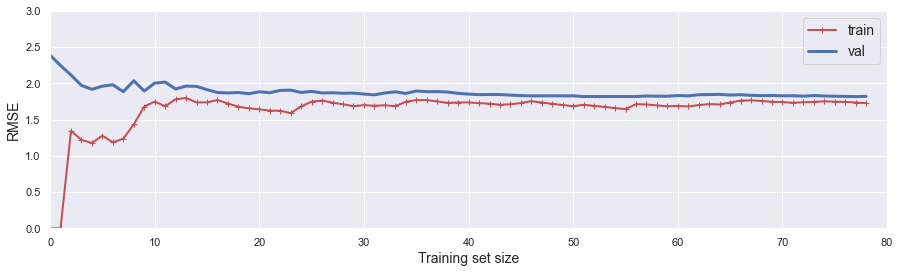

In [9]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()   

- <font color='blue'> Underfitting (High biased) : 2 개의 곡선이 uniform 해지면서 서로 가까워지고(converge) 에러(RMSE)가 상당히 높다
- 훈련데이터 : 처음 2개까지는 RMSE는 '0'이나 데이터가 증가하여도 더 이상 개선되지 않음
- 검증데이터 : 처음에는 일반화하지 못하다가 감소하는 추세를 보였지만 데이터가 증가하여도 더 이상 개선되지 않음
- Underfitting 해결방법은 모델을 변경하는 것 ! 

### 3.2 Overfitting (High complexity model)
- 원래 데이터를 10차의 polynomial로 변환(basis function)하여 회귀생성

(0.0, 80.0, 0.0, 3.0)

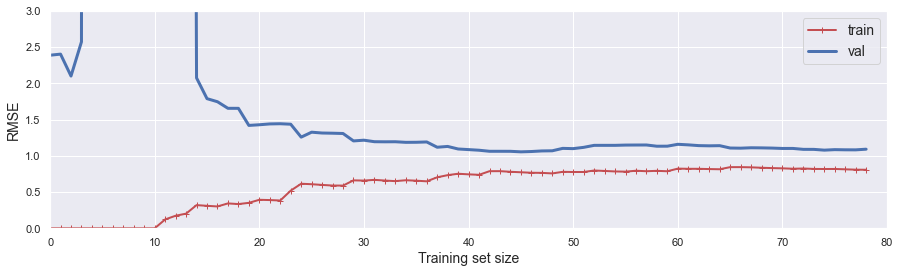

In [10]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

- <font color='blue'> Overfitting (High variance) : 2 개의 곡선이 서로 가까워지려고 하고 에러(RMSE)가 비교적 낮다.
- 훈련데이터 : low complexity 모델보다 에러(RMSE)가 비교적 아주 낮다.
- 검증데이터 : 훈련과 검증데이터의 gap이 엄청 크고 훈련데이터에서는 에러가 검증데이터보다 훨씬 적다. 데이터가 증가하면 에러가 줄어 성능이 개선될 것임
- Overfitting 해결방법은 Regularization이다.
          * 모델의 Hyperparameter tuning (최근접이웃의 개수, lasso, ridge, SVM, 의사결정트리 depth)

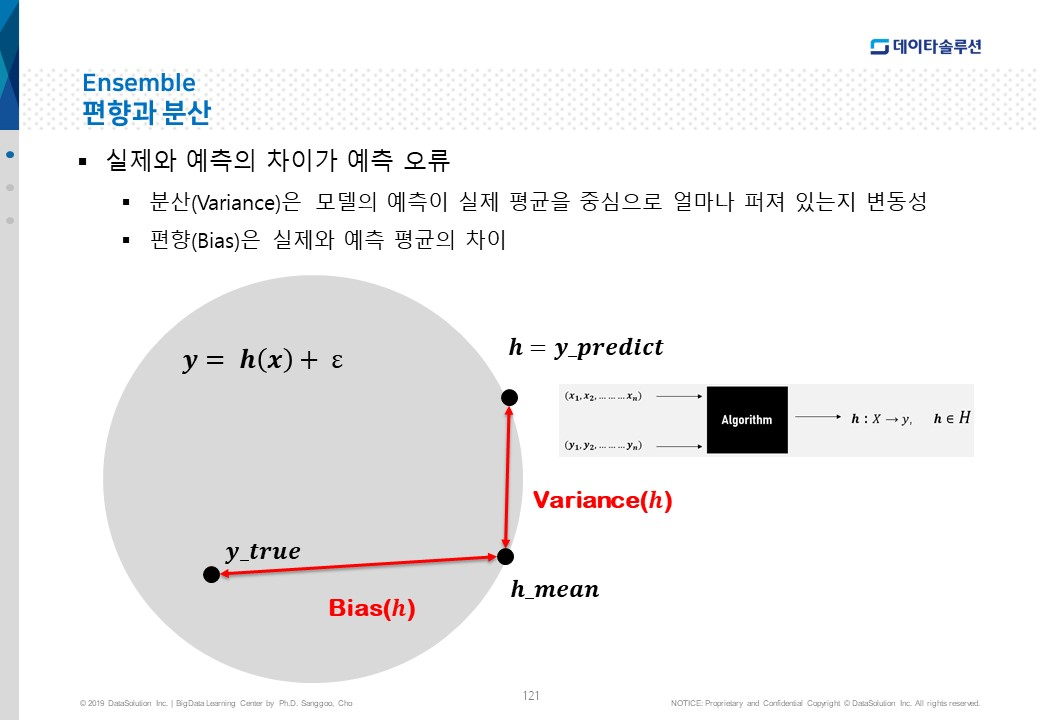

In [11]:
import os
os.chdir('D:/2021_데이터솔루션/발표자료/Python_데이터과학_머신러닝_20210823/')
from IPython.display import Image
width=800; height=500
Image(filename='슬라이드121.jpg', width=width, height=height)

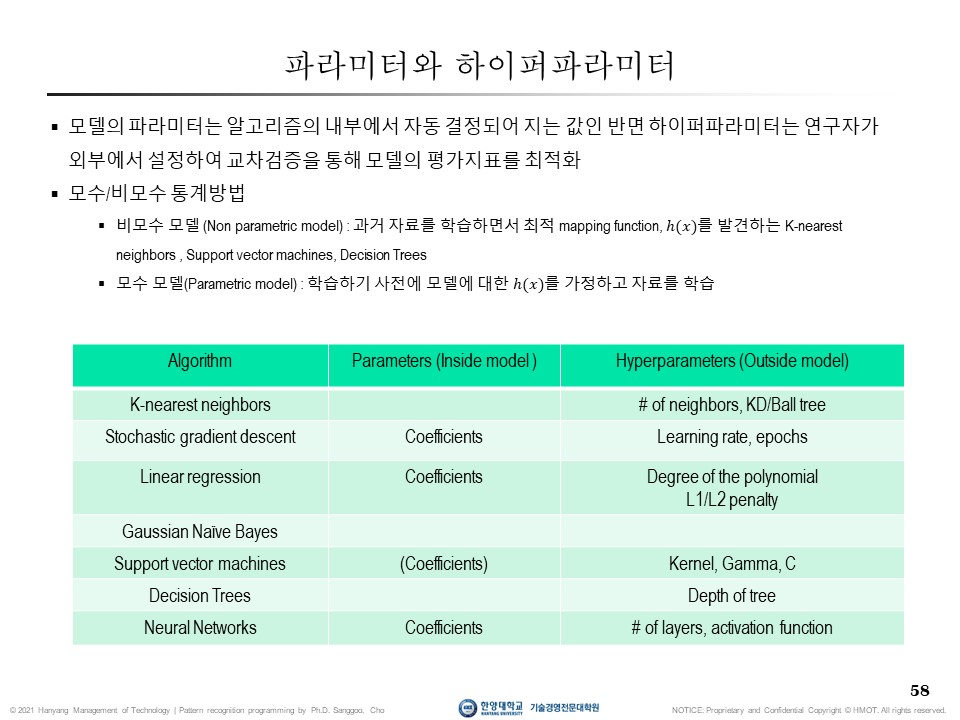

In [12]:
from IPython.display import Image
width=800; height=500
Image(filename='D:/HMOT강의/image/cv/슬라이드58.jpg', width=width, height=height)

# 편향과 분산에 대하여
https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

- 편향(Bias)은 가정 사항을 단순화시켜 예측을 쉽게 하는 것을 의미하며, 분산(Variance)은 훈련데이터의 변화에 대한 모델의 민감도이다. 
- 모델의 편향이 높아지면 분산은 낮아지게 되는 반비례 관계이다. Parametric 알고리즘은 매핑 함수에 대한 가정 사항으로 편향이 낮고 분산이 높은 경향이 있다. 
- 머신러닝의 궁극적인 목적은 편향과 분산을 동시에 낮추는 것이다. 

- 모델의 분산이 높은 것은 과거 자료에 대해 지나친 학습을 통해 일반화하지 못하고 자료를 모델에 특정화시켜 새로운 데이터를 예측하지 못한 경우로 모델이 과적합(Overfitting)되었다고 한다. 
     * 과적합은 분산은 높고 편향이 낮다. 
     * 과거의 구체적인 자료로부터 를 탐색한다는 것은, 구체적인 자료를 일반화하여(generalization) 모델(model)을 만들어 새로운 입력 자료를 예측하는 것이다. 

- 모델은 과적합과 Underfitting의 문제가 발생한다. Underfitting이 발생하면 예측 성능이 낮아서 다른 알고리즘을 탐색하여 해결할 수 있다. 
     * 과적합은 알고리즘이 자료를 학습하는 동안 자료의 noise도 일반화하여 모델에 반영한 경우이다. 
     * 과적합을 해결하는 방법은 교차검증, 훈련과 시험 이외 검증데이터를 준비하여 예측 결과를 확인하는 것이다. 
     * 일반적으로 Non parametric과 Non linear 알고리즘은 유연하므로 과적합 발생 가능성이 크다. 따라서 알고리즘 대부분은 과적합을 낮추려고 하고 있다. 

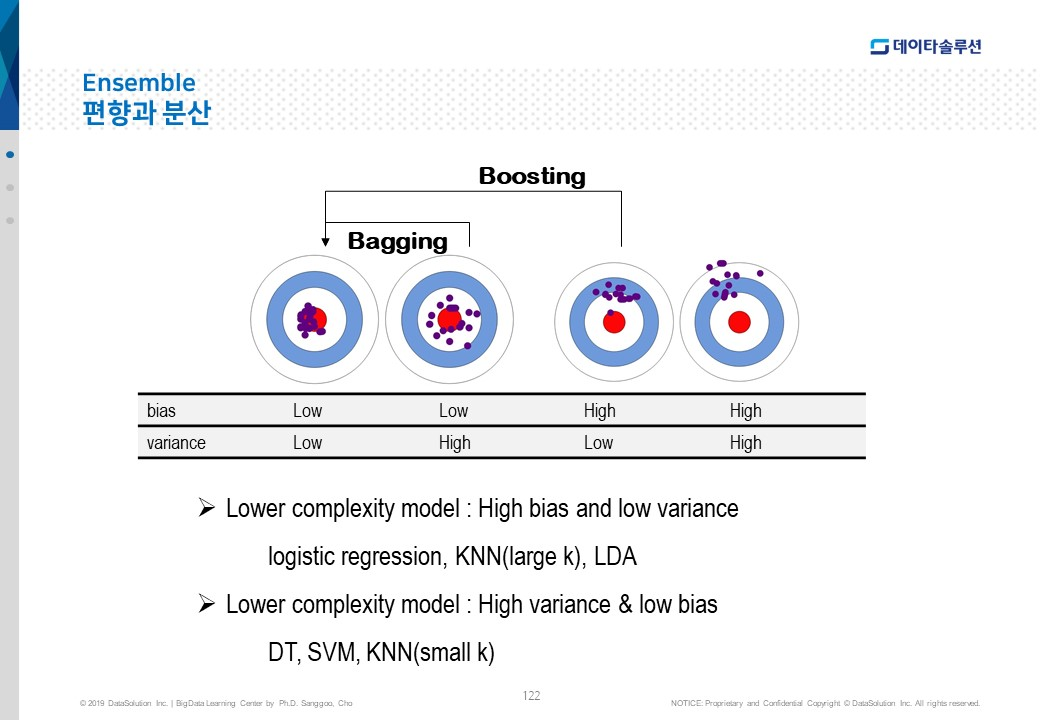

In [13]:
Image(filename='슬라이드122.jpg', width=width, height=height)

### <font color='blue'> Overfitting 된 모델의 해결방법은 Regularization이다. 
### Roughly speaking, 머신러닝은 High variance를 갖는 복잡한 모델을 regularization하는 것이다.
- Underfitting된 모델대신 복잡한 모델을 찾은 후 regularization한다.

# END